# Recognizing numbers from MNIST dataset with Artificial Neural Networks

In [1]:
####--------------------# Required libraries#-------------------####
import  tensorflow as tf 
from tensorflow.keras.datasets import mnist # # Library of Dataset
from tensorflow.keras.models import load_model, Sequential # Library for the installation of the model
from tensorflow.keras.layers import Dense, Flatten  # Library related to artificial neural network layers
from tensorflow.keras.utils import to_categorical, plot_model # required library to use preprocessing

import matplotlib.pyplot as plt
import numpy as np

import warnings # libraries required for alerts
from warnings import filterwarnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=UserWarning)
filterwarnings("ignore")




The process of loading the dataset and splitting it into training and test data

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Training and testing data were looked at; It has been seen that there are 60,000 data in the training and 10,000 data in the test.

In [3]:
print("Training Set Size:",x_train.shape,y_train.shape)

Training Set Size: (60000, 28, 28) (60000,)


In [4]:
print("Test Set Size:",x_test.shape,y_test.shape)

Test Set Size: (10000, 28, 28) (10000,)


We look at how many different categories our independent variable is in.

### Examples from the dataset

In [5]:
num_labels = len(np.unique(y_train))

59,000. observation checked. The screen color tone (cmap) is selected as gray.

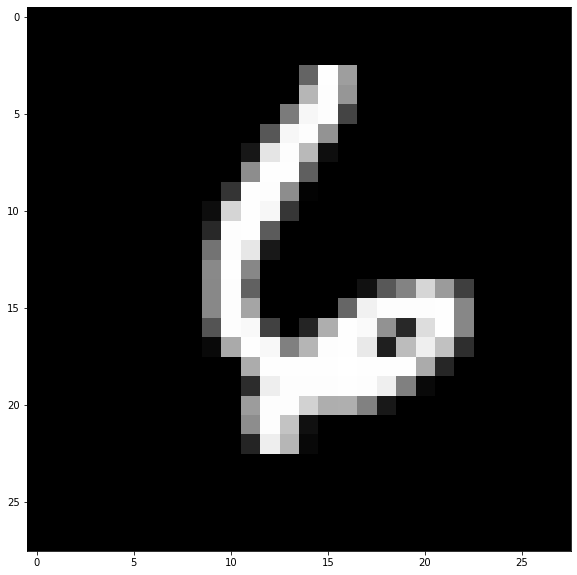

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(x_train[59000], cmap='gray');


If we want to see ten images from the dataset, we can do it with a for loop.

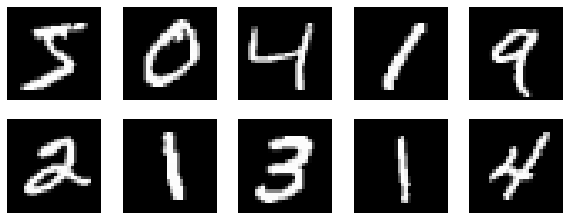

In [7]:
plt.figure(figsize=(10,10))
for n in range(10):
  ax=plt.subplot(5,5,n+1)
  plt.imshow(x_train[n],cmap='gray')
  plt.axis('off')

In [8]:
def visualize_img(data):
  plt.figure(figsize=(10,10))
  for n in range(10):
    ax=plt.subplot(5,5,n+1)
    plt.imshow(x_train[n],cmap='gray')
    plt.axis('off')

In [9]:
x_train[2].shape

(28, 28)

##  Data Preparation

### Encoding
It is implemented for dependent variables (label, output). The expression in which the dependent variable is shown is "1" and the others are "0".

In [10]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)

In [12]:
y_train[0:5] #The first picture (with index 0) got the value 1 in the column corresponding to 5.

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## Reshaping

In this section, the process of transferring the pixelation process as a dimension is included.

In [13]:
image_size = x_train.shape[1]

In [14]:
image_size

28

In [15]:
x_train= x_train.reshape(x_train.shape[0],28,28,1)
x_test= x_test.reshape(x_test.shape[0],28,28,1)

print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_train boyutu: (60000, 28, 28, 1)
x_test boyutu: (10000, 28, 28, 1)


### Standardization
We perform the scaling process between 0 and 1 in order to learn our data faster and more accurately.

In [16]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

## Modeling

### Neural Network Architecture

Input layer information (width, height, channel(28,28,1)) is defined in "flatten". The model consists of a hidden layer. 128 neurons are used in the hidden layers. The activation function in the hidden layers is the "relu" function. The output layer consists of 10 neurons. The "softmax" function is used in the output layer. The reason the output layer is "softmax" is because it is multi-classing."categrical_crossentropy" was used as the error classification metric. Because our model is multi-classification. The "man" method was chosen as the optimization method to minimize the loss function.Precision, Recall, and accuracy were used as success metrics.

In [17]:
model = tf.keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(units=128, activation='relu',name='layer1'),
    Dense(units=num_labels,activation='softmax',name='output_layer')

])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),"accuracy"])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Model structure: 784 pixel input is given in the input layer of the model. Our middleware consists of 128 neurons. Since there are 10 digits in our output layer, there are 10 neurons. There are 100840 parameters in the hidden layer and 1290 parameters in the output layer.

10 iterations were used for training. Batch is given to you as 128. Training dataset is given as validation data.

In [20]:
history=model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0251 - precision: 0.9945 - recall: 0.9924 - accuracy: 0.9936 - val_loss: 0.0727 - val_precision: 0.9802 - val_recall: 0.9768 - val_accuracy: 0.9777
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0217 - precision: 0.9954 - recall: 0.9937 - accuracy: 0.9946 - val_loss: 0.0736 - val_precision: 0.9801 - val_recall: 0.9768 - val_accuracy: 0.9780
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0188 - precision: 0.9962 - recall: 0.9947 - accuracy: 0.9954 - val_loss: 0.0729 - val_precision: 0.9793 - val_recall: 0.9766 - val_accuracy: 0.9775
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0155 - precision: 0.9969 - recall: 0.9961 - accuracy: 0.9966 - val_loss: 0.0787 - val_precision: 0.9785 - val_recall: 0.9758 - val_accuracy: 0.9772
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0129 - precision: 0.9978 - r

## Evaluation

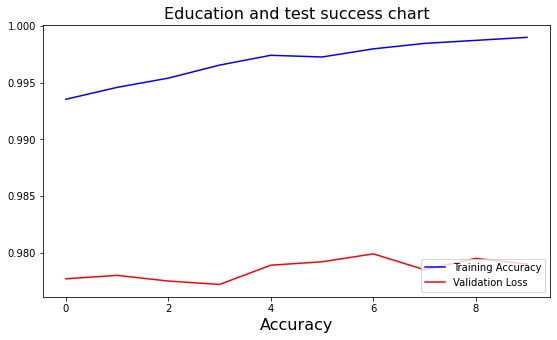

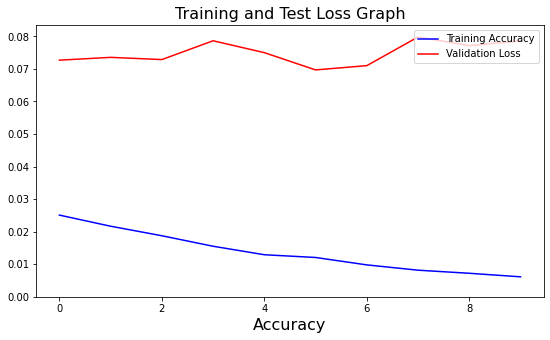

In [23]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],color='b',label='Training Accuracy')
plt.plot(history.history['val_accuracy'],color='r',label='Validation Loss')
plt.legend(loc='lower right')
plt.xlabel('Epoch',fontsize=16)
plt.xlabel('Accuracy',fontsize=16)
plt.ylim(min(plt.ylim()))
plt.title('Education and test success chart', fontsize=16)

#-------------------------grapic 2---------------------------##
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(history.history['loss'],color='b',label='Training Accuracy')
plt.plot(history.history['val_loss'],color='r',label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch',fontsize=16)
plt.xlabel('Accuracy',fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Test Loss Graph', fontsize=16)
plt.show()



In [ ]:
loss,precision,recall,acc= model.evaluate(x_test,y_test,verbose=False)
print("\nTest Accuracy: %.1f%%" % (100.0*acc))
print("\nTest Loss: %.1f%%" % (100.0*loss))
print("\nTest Precision: %.1f%%" % (100.0*precision))
print("\nTest Recall: %.1f%%" % (100.0*recall))





Test Accuracy: 97.9%

Test Loss: 8.3%

Test Precision: 97.9%

Test Recall: 97.8%


The prediction accuracy of the model was 97.1%. Difference precision and recall metrics used in classification data were used. Precision reported 97.9% accuracy, recall 97.8% accuracy.

## Saving the Model and Using it for Prediction

In [ ]:
model.save('mnist_model.h5')

In [ ]:
import random

random=random.randint(0,x_test.shape[0])

In [ ]:
random

886

In [ ]:
test_image= x_test[random]


In [ ]:
y_test[random]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

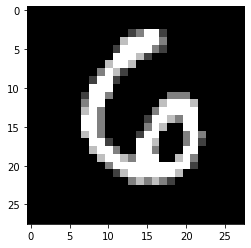

In [ ]:
plt.imshow(test_image.reshape(28,28), cmap='gray');

In [ ]:
test_data= x_test[random].reshape(1,28,28,1)

In [ ]:
probability=model.predict(test_data)

1/1 [==============================] - 0s 54ms/step


In [ ]:
probability

array([[3.5423891e-08, 4.1896452e-11, 8.5495533e-10, 1.2525699e-15,
        1.0943016e-09, 1.3188756e-08, 9.9998152e-01, 1.2663630e-12,
        3.9679116e-10, 1.8465769e-05]], dtype=float32)

In [ ]:
predicted_classes=np.argmax(probability)

In [ ]:
predicted_classes

6